**Autores:**
- Carolina Naranjo
- Daniel Guzman
- Johana Castillo
- Juan Martin Pastuso Borda


A continuación se presenta un análisis univariado y bivariado, ya que hemos cambiado el dataset anterior por motivos de fuerza mayor. 

### Dataset: Datos clinicos sobre diabetes

El data set que se presenta a continuación incluye información de 100.000 personas, recopilando variables demográficas y de salud para el estudio de la diabetes. 

Fuente: https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows


**Pregunta SMART**
- ¿Cuáles son los factores de riesgo para el desarrollo de diabetes e hipertensión en 2019 en la población Estadounidense, considerando las variables demográficas, de salud y de estilo de vida?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis # estadisticas para coef asimetria, coef kurtosis

Leer dataset

In [2]:

df = pd.read_csv('diabetes_dataset_with_notes.csv').drop('clinical_notes', axis=1)
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


Información general según python:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

DICCIONARIO O METADATOS DEL DATASET:

| Columna | Descripción | Tipo | Rango / No. Categorías |
|:-----:|:-----:|:-----:|:-----:|
| year | año del registro | Cualitativa | Categorías: 7 (2015, 2016, 2018, 2019, 2020, 2021, 2022)|
| gender | genero | Cualitativa | Categorías: 3 (Female, Male, Other)|
| age | Edad |Cuantitativa | Rango: [0 - 80] |
| location | Locación | Cualitativa | Categorías: 55 |
| race:AfricanAmerican | Afro-Americanos | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| race:Asian | Asiatico | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| race:Caucasian | Caucasicos | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| race:Hispanic | Hispanos | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| race:Other | Otra | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| hypertension | Sufre de hipertension | Cualitativa| Categorías: 2 (0: No, 1: Si) |
| heart_disease | Sufre de enfermedades cardiacas | Cualitativa | Categorías: 2 (0: No, 1: Si) |
| smoking_history | Historal de fumador | Cualitativa | Categorías: 6(nunca, no actualmente, actualmente, Sin informacion, Alguna vez, Anteriormente) |
| bmi | Indice de masa corporal | Cuantitativa | Rango: [10 - 95.7] |
| hbA1c_level | Nivel de hemoglobina glucolisada  | Cuantitativa | Rango: [3.5 - 9] |
| blood_glucose_level | Nivel de glucosa en la sangre| Cuantitativa | Rango: [80 - 300] |
| diabetes | Sufre de diabetes | Cualitativa | Categorías: 2 (0: No, 1: Si) |

Este dataset contiene información del periódo 2015 a 2022, pero se filtra solo la información del año 2019, ya que la muestra es mayor en comparación con los demás años. La utilizamos para obtener un mejor análisis.

In [4]:
df_2019 = df[df['year'] == 2019]
df_2019

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
73,2019,Male,55.00,Alabama,0,0,0,1,0,0,0,No Info,27.94,6.0,158,0
335,2019,Female,1.72,Alabama,0,0,0,1,0,0,0,No Info,16.28,6.2,100,0
337,2019,Female,55.00,Alabama,0,1,0,0,0,0,0,never,28.30,6.0,140,0
340,2019,Female,53.00,Alabama,0,1,0,0,0,0,0,never,35.84,6.0,155,0
341,2019,Female,38.00,Alabama,0,1,0,0,0,0,0,never,31.91,5.8,200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99221,2019,Female,58.00,West Virginia,1,0,0,0,0,1,0,never,38.31,7.0,200,1
99222,2019,Male,32.00,West Virginia,1,0,0,0,0,0,0,ever,37.71,6.1,126,0
99223,2019,Male,66.00,West Virginia,0,1,0,0,0,0,0,former,27.83,5.7,155,0
99610,2019,Female,8.00,Wisconsin,1,0,0,0,0,0,0,No Info,27.32,6.1,80,0


Verifiquemos la presencia de datos nulos:

In [5]:
df_2019.isnull().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

Verifiquemos la presencia de datos duplicados:

In [6]:
df_2019.duplicated().sum()

np.int64(14)

In [7]:
df_2019[df_2019.duplicated()]

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
2848,2019,Male,40.0,Alaska,0,0,1,0,0,0,0,No Info,27.32,6.2,85,0
21662,2019,Male,65.0,Georgia,0,1,0,0,0,0,0,No Info,27.32,4.0,90,0
23313,2019,Female,21.0,Guam,0,1,0,0,0,0,0,never,27.32,6.6,155,0
33506,2019,Male,13.0,Iowa,0,1,0,0,0,0,0,No Info,27.32,4.8,160,0
43401,2019,Male,46.0,Maryland,0,1,0,0,0,0,0,never,27.32,6.6,90,0
57881,2019,Female,62.0,Nebraska,1,0,0,0,0,0,0,No Info,27.32,4.0,126,0
59507,2019,Male,14.0,Nevada,0,1,0,0,0,0,0,No Info,27.32,6.5,200,0
61867,2019,Female,11.0,New Hampshire,0,1,0,0,0,0,0,No Info,27.32,6.6,85,0
65311,2019,Female,80.0,New Mexico,1,0,0,0,0,0,0,No Info,27.32,5.7,159,0
71285,2019,Female,80.0,North Dakota,0,0,1,0,0,0,0,No Info,27.32,5.8,126,0


In [8]:
df_2019.drop_duplicates(inplace=True)
df_2019

C:\Users\guzma\AppData\Local\Temp\ipykernel_25920\926207867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019.drop_duplicates(inplace=True)


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
73,2019,Male,55.00,Alabama,0,0,0,1,0,0,0,No Info,27.94,6.0,158,0
335,2019,Female,1.72,Alabama,0,0,0,1,0,0,0,No Info,16.28,6.2,100,0
337,2019,Female,55.00,Alabama,0,1,0,0,0,0,0,never,28.30,6.0,140,0
340,2019,Female,53.00,Alabama,0,1,0,0,0,0,0,never,35.84,6.0,155,0
341,2019,Female,38.00,Alabama,0,1,0,0,0,0,0,never,31.91,5.8,200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99221,2019,Female,58.00,West Virginia,1,0,0,0,0,1,0,never,38.31,7.0,200,1
99222,2019,Male,32.00,West Virginia,1,0,0,0,0,0,0,ever,37.71,6.1,126,0
99223,2019,Male,66.00,West Virginia,0,1,0,0,0,0,0,former,27.83,5.7,155,0
99610,2019,Female,8.00,Wisconsin,1,0,0,0,0,0,0,No Info,27.32,6.1,80,0


### Preparación de los datos:

La base de datos contiene información sobre la raza. Esta variable es importante porque es uno de los factores de riesgo para presentar diabetes, sin embargo la forma como está presentada no permite hacer un adecuado análisis. Por tanto, se crea una columna que apile los datos de raza (Americano, asiatico, caucasico, hispano y otros)

In [9]:
race_columns = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']
df_2019 = df_2019.copy()
# Crea la nueva columna basada en la columna con el valor 1
df_2019['race'] = df_2019[race_columns].idxmax(axis=1).str.replace('race:', '')
df_2019.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,race
73,2019,Male,55.00,Alabama,0,0,0,1,0,0,0,No Info,27.94,6.0,158,0,Hispanic
335,2019,Female,1.72,Alabama,0,0,0,1,0,0,0,No Info,16.28,6.2,100,0,Hispanic
337,2019,Female,55.00,Alabama,0,1,0,0,0,0,0,never,28.30,6.0,140,0,Asian
340,2019,Female,53.00,Alabama,0,1,0,0,0,0,0,never,35.84,6.0,155,0,Asian
341,2019,Female,38.00,Alabama,0,1,0,0,0,0,0,never,31.91,5.8,200,0,Asian


Visualicemos distribución para las categrías de la nueva columna:

In [10]:
df_2019.race.value_counts()

race
AfricanAmerican    16065
Caucasian          16017
Hispanic           15922
Other              15894
Asian              15833
Name: count, dtype: int64

La variable genero permite identificar el sexo de las personas con diabetes. Para el análisis necesitamos saber si los datos son relevantes para el estudio, así que procederemos a presentar la información para determinar qué datos se eliminan o ajustan.

In [11]:
df_2019.gender.value_counts()

gender
Female    46636
Male      33078
Other        17
Name: count, dtype: int64

In [13]:
df_2019[df_2019['gender'] == "Other"]

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,race
1611,2019,Other,23.0,Alabama,0,1,0,0,0,0,0,No Info,24.23,6.1,140,0,Asian
2550,2019,Other,19.0,Alaska,0,0,1,0,0,0,0,No Info,27.32,5.7,158,0,Caucasian
2787,2019,Other,39.0,Alaska,0,1,0,0,0,0,0,not current,31.24,6.2,85,0,Asian
5064,2019,Other,10.0,Arizona,0,0,1,0,0,0,0,not current,16.59,6.1,160,0,Caucasian
7975,2019,Other,45.0,Arkansas,0,0,0,1,0,0,0,never,27.32,4.0,159,0,Hispanic
19647,2019,Other,47.0,Florida,0,0,1,0,0,0,0,never,36.76,6.6,90,0,Caucasian
19658,2019,Other,47.0,Florida,1,0,0,0,0,0,0,never,36.76,3.5,200,0,AfricanAmerican
22784,2019,Other,53.0,Guam,0,0,1,0,0,0,0,No Info,27.32,6.6,160,0,Caucasian
32002,2019,Other,18.0,Iowa,0,0,1,0,0,0,0,not current,30.19,6.1,90,0,Caucasian
52722,2019,Other,10.0,Missouri,0,0,1,0,0,0,0,not current,19.75,6.1,126,0,Caucasian


De acuerdo con la anterior tabla, la cantidad de datos de la columna "gender" para la categoría 'Other' no es **representativa** dentro del conjunto de datos, procedemos a limpiar.

In [12]:
df_2019 = df_2019[~(df_2019['gender'] == "Other")]
df_2019

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,race
73,2019,Male,55.00,Alabama,0,0,0,1,0,0,0,No Info,27.94,6.0,158,0,Hispanic
335,2019,Female,1.72,Alabama,0,0,0,1,0,0,0,No Info,16.28,6.2,100,0,Hispanic
337,2019,Female,55.00,Alabama,0,1,0,0,0,0,0,never,28.30,6.0,140,0,Asian
340,2019,Female,53.00,Alabama,0,1,0,0,0,0,0,never,35.84,6.0,155,0,Asian
341,2019,Female,38.00,Alabama,0,1,0,0,0,0,0,never,31.91,5.8,200,0,Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99221,2019,Female,58.00,West Virginia,1,0,0,0,0,1,0,never,38.31,7.0,200,1,AfricanAmerican
99222,2019,Male,32.00,West Virginia,1,0,0,0,0,0,0,ever,37.71,6.1,126,0,AfricanAmerican
99223,2019,Male,66.00,West Virginia,0,1,0,0,0,0,0,former,27.83,5.7,155,0,Asian
99610,2019,Female,8.00,Wisconsin,1,0,0,0,0,0,0,No Info,27.32,6.1,80,0,AfricanAmerican


Funciones para obtener un análisis estadístico mas completo:

In [15]:
def tabla_descriptivas(columnas):
    """
    Retorna estadísticas descriptivas de columnas numéricas, incluyendo coeficiente de variación, asimetría y curtosis.
    
    Parámetros:
        columnas (pd.Series o pd.DataFrame): Datos numéricos.
    
    Retorna:
        pd.DataFrame: Tabla con estadísticas descriptivas.
    """
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean() # Coeficiente variación
    tabla_descriptivas.loc['skew']=skew(columnas) # coeficiente de asimetria
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas) # coeficiente de curtosis.
    return tabla_descriptivas

## Función para construir tablas de frecuencias
def tabla_freq(columna):
    """
    Crea una tabla con frecuencias absolutas y relativas de una columna categórica.
    
    Parámetros:
        columna (pd.Series): Datos categóricos.
    
    Retorna:
        pd.DataFrame: Tabla con frecuencias absolutas y relativas.
    """
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

### Análisis univariado del dataset:

Las variables seleccionadas son del tipo cualitativo y cuantitativo. En la primera, race, no se cuenta con un valor numérico o una escala cuantitativa que permita hacer comparaciones directas o análisis estadísticos que identifiquen patrones de manera clara; sin embargo, al ser categórica, permite mostrar la distribución de cada categoría para identificar la prevalencia o el tipo de captura de información.




#### Variable seleccionada: 'race'.

- Se escogió la variable raza para el análisis porque permite evaluar cómo los factores genéticos, socioeconómicos y culturales asociados con el origen étnico influyen en los riesgos para desarrollar enfermedades crónicas como diabetes e hipertensión.

In [14]:
# Tabla. Frecuencia de raza

tabla_race = tabla_freq(df_2019['race']).sort_values(by='Frec. Abs.', ascending=False)
tabla_race

col_0,race,Frec. Abs.,Frec. Rel.
0,AfricanAmerican,16064,0.201520
2,Caucasian,16008,0.200818
3,Hispanic,15919,0.199701
4,Other,15892,0.199363
1,Asian,15831,0.198597


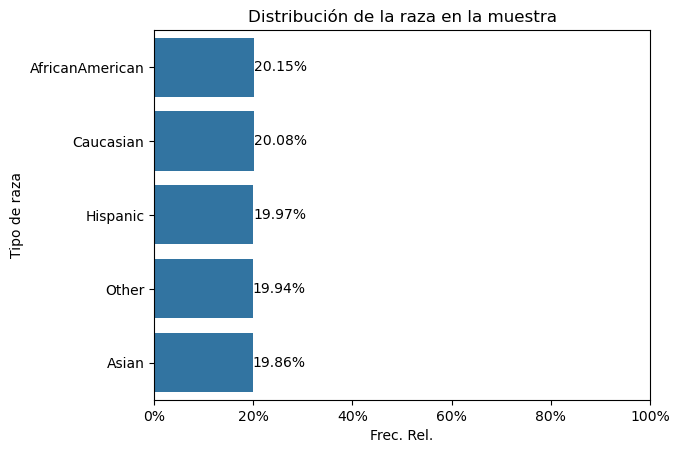

In [17]:
#Gráficar
tipo_race=sns.barplot(y=tabla_race['race'],x=tabla_race["Frec. Rel."]*100)
tipo_race.bar_label(tipo_race.containers[0], label_type='edge',fmt='%.2f%%') # visualizar porcentajes por barra
tipo_race.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) # Visualizar eje y en mi escala porcentajes
tipo_race.set(xlim=(0, 100))
tipo_race.set_ylabel('Tipo de raza')
tipo_race.set_title('Distribución de la raza en la muestra')
plt.show() 

**Conclusión:** La  gráfica de distribución de la raza junto con la tabla de frecuencias muestra que los datos están equilibrado, indicando que ninguna raza domina el conjunto de datos,esta distribución reduce el riesgo de que al hacer un modelo favorezca ciertos grupos debido a un desequilibrio en los datos.

#### Variable: 'age'.

- La variable cuantitativa age permite realizar análisis más detallados, como el cálculo de medidas de tendencia central (media, mediana) y de dispersión (desviación estándar, rango), lo que facilita la identificación de tendencias, agrupamientos de edad y la correlación con otras variables, como la presencia de diabetes o hipertensión.


In [18]:
# Tabla de estadísticas descriptivas
estadisticas_age = tabla_descriptivas(df_2019['age'])
estadisticas_age


,age
count,79714.000000
mean,41.860119
std,22.505972
min,0.080000
25%,24.000000
50%,43.000000
75%,60.000000
max,80.000000
coef. variation,0.537647
skew,-0.049765


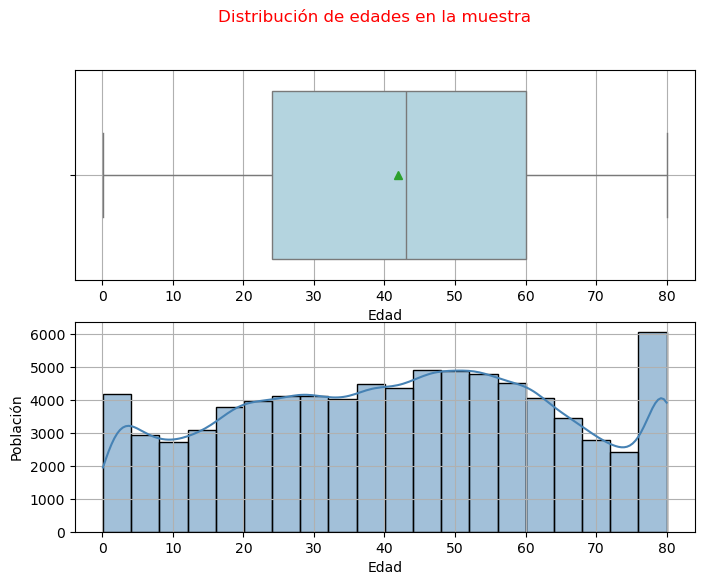

In [19]:
# Gráfica de distribución de las edades
fig, axes = plt.subplots(2, 1, figsize=(8,6))

# Titulo general
fig.suptitle('Distribución de edades en la muestra', color='r')

# Primer imagen
sns.boxplot(x=df_2019['age'], ax = axes[0],color="lightblue",showmeans=True) ## crea el boxplot
axes[0].set_xlabel('Edad')
axes[0].grid()
# Segunda imagen
sns.histplot(x=df_2019['age'],kde=True,color="steelblue", ax=axes[1], bins = 20)
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Población')
axes[1].grid()


plt.show() 

**Conclusión:** De acuerdo con las estadísticas descriptivas y la gráfica, la mayoría de los casos de la muestra se concentran en personas de entre 23 y 60 años. Además, el 50% de los datos se encuentra en los 43 años, lo que sugiere que la mediana de edad es un punto clave para la detección y el manejo de la diabetes. El rango de edades es amplio, con un mínimo de 0.08 años, indicando la presencia de bebés en la muestra, y un máximo de 80 años. A simple vista, se puede intuir la necesidad de adaptar estrategias de intervención a diferentes etapas de la vida, desde la infancia hasta la tercera edad.

#### Proximos pasos:

Los próximos pasos incluyen realizar un análisis descriptivo para entender la distribución de las variables, seguido de un análisis bivariado para explorar las relaciones entre diabetes y otras variables como edad, BMI, raza, y tabaquismo.
De igual forma, se realizara un modelo de regresión logística para identificar los factores predictivos significativos de la diabetes.
Finalmente, se desarrollará un modelo de clasificación, se visualizarán los resultados y se propondrán recomendaciones para intervenciones preventivas basadas en los hallazgos del análisis.


### Análisis Bivariado


- Variables seleccionadas para el análisis: BMI vs Diabetes

In [20]:

bmi_diabetes = df_2019.groupby('diabetes')['bmi'].describe()
bmi_diabetes

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,72987.0,26.883378,6.378322,10.08,23.21,27.32,28.840,95.69
1,6727.0,31.936128,7.410804,10.98,27.32,29.99,35.795,83.74


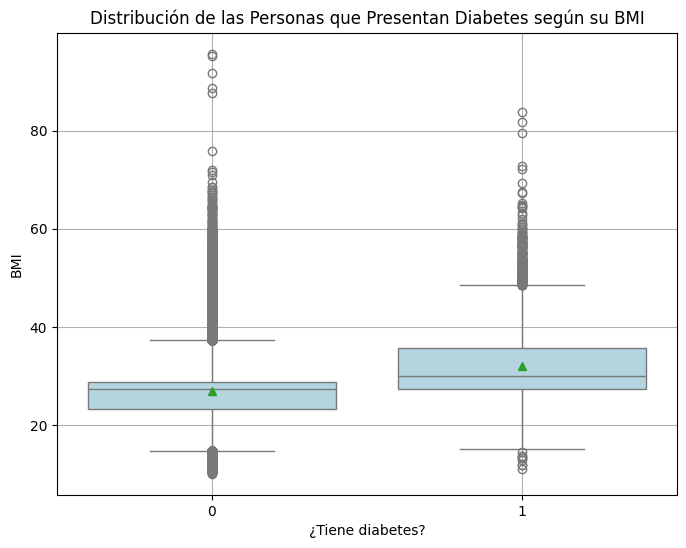

In [ ]:
#Gráfico de distribución de las personas que presentan diabetes según su BMI
plt.figure(figsize=(8,6)) 
boxplot_des_alt=sns.boxplot(x=df_2019['diabetes'],y=df_2019['bmi'],color="lightblue",showmeans=True) ## crea el boxplot
boxplot_des_alt.set_xlabel('¿Tiene diabetes?') ## cambia el título del eje x
boxplot_des_alt.set_ylabel('BMI') ## cambia el título del eje x
boxplot_des_alt.set_title('Distribución de las Personas que Presentan Diabetes según su BMI')
plt.grid()
plt.show()  

El grafico muestra que las personas con diabetes (1) tienden a tener un BMI mas alto en comparacion con las personas que no presentan la enfermedad, La mediana y la media del BMI en el grupo con diabetes son mayores, lo que sugiere una relación entre el sobrepeso y la probabilidad de desarrollar diabetes, Sin embargo se observa una superposición en los rangos de BMI entre ambos grupos lo que puede indicar que este factor, aunque relevante, no es el único determinante de la enfermedad.

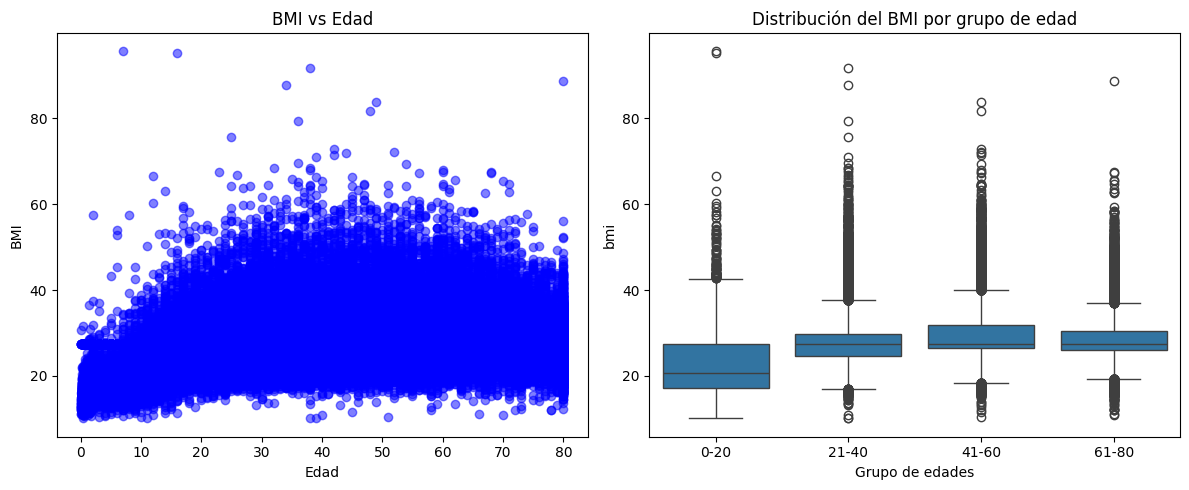

In [22]:
#Gráfico de distribución entre BMI y edad
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Gráfico de dispersión
axes[0].scatter(df_2019['age'], df_2019['bmi'], color='blue', alpha=0.5)
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('BMI')
axes[0].set_title('BMI vs Edad')

# Gráfico de boxplot
df_2019['Grupo de edades'] = pd.cut(df_2019['age'], bins=[0, 20, 40, 60, 80], 
labels=['0-20', '21-40', '41-60', '61-80'])
sns.boxplot(x='Grupo de edades', y='bmi', data=df_2019, ax=axes[1])
axes[1].set_title('Distribución del BMI por grupo de edad')

# Ajustar el espaciado
plt.tight_layout()
plt.show()

En el grafico de distribución se puede observar una mayor densidad de puntos en el rango de edades de 20 a 70 años con valores de BMI aproximadamente entre 20 y 40 y algunos valores atípicos con un BMI superior a 70 en edades muy bajas lo que podría indicar registros atípicos o errores en los datos, por otro lado, no parece haber una correlación clara entre la edad y el BMI, ya que el BMI se mantiene distribuido de forma relativamente uniforme en todas las edades 

En el boxplot se observa que la mediana del BMO se mantiene relativamente constante en todos los grupos de edad, rondando valores cercanos a 25-30, lo que indica que el índice de masa corporal promedio no varía drásticamente con la edad y nuevamente se observan gran cantidad de valores atípicos que reflejan que hay individuos con obesidad en todas las franjas de edad, lo que podría sugerir que la obesidad no es exclusiva de adultos mayores, sino que afecta a todas las edades.


Se han escogido las variables BMI y EDAD porque son determinantes para el desarrollo de diabetes en la población, sin embargo, queremos conocer la correlación y otras metricas para corroborar que estas variables si se relacionan y pueden explicar la diabetes.

In [23]:
##Correlación de las variables
correlacion_bmi_age = df['bmi'].corr(df['age'])
print(f"La correlación entre BMI y edad es: {correlacion_bmi_age}") 


La correlación entre BMI y edad es: 0.3373957761861747


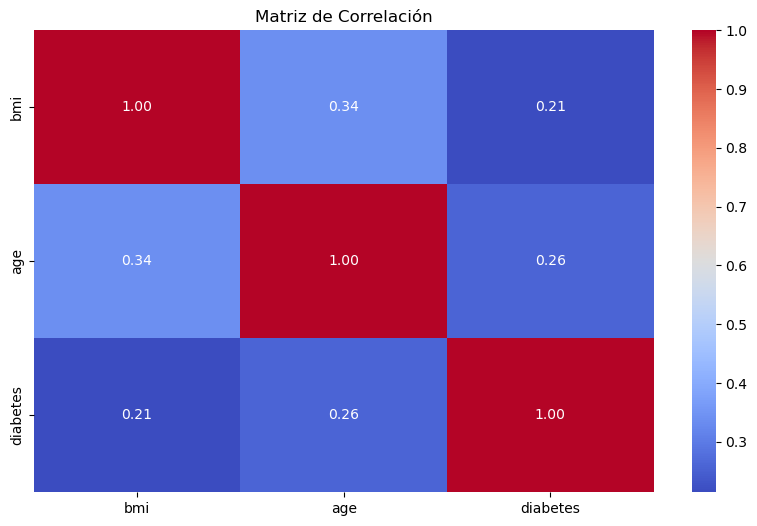

In [24]:
## Matriz de Correlación
plt.figure(figsize=(10,6))
sns.heatmap(df[['bmi', 'age', 'diabetes']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Teniendo en cuenta el gráfico anterior ninguna de las correlaciones es extremadamente fuerte( no se acercan a 1 o -1).
Tanto el BMI como la Edad tienen una relación positiva con la diabeter, lo que significa que mayor BMI o mayor edad, hay una ligera tendencia a un mayor riesgo de diabetes. 

Sin embargo, debido a que los valores de correlación son relativamente bajos entre 0.2 y .34 indica que hay otros factores importantes además de BI y la Edad que influyen en el desarrollo de diabetes. 

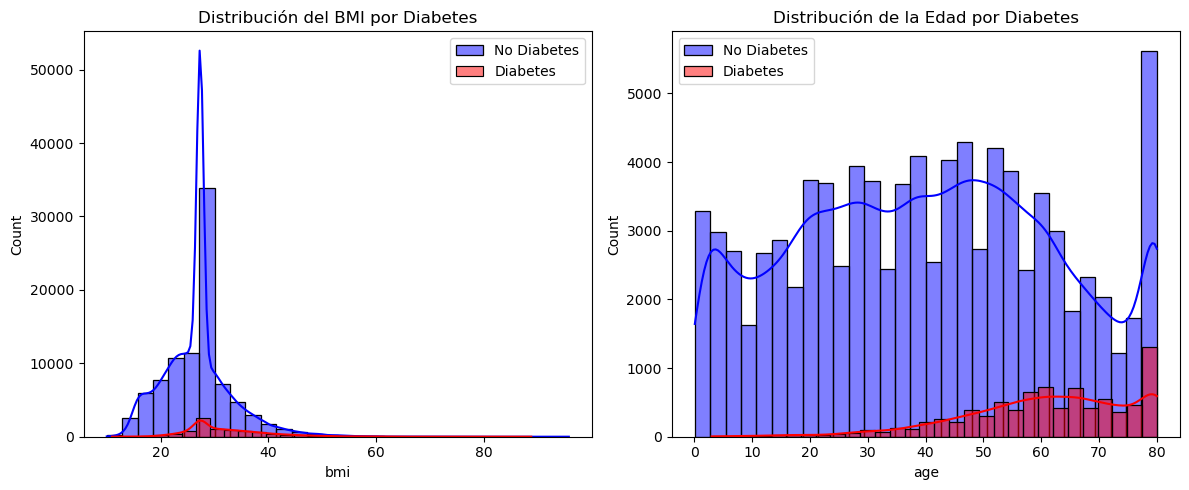

In [25]:
# 🔹 Histogramas comparativos de BMI y Edad según Diabetes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[df['diabetes'] == 0]['bmi'], bins=30, kde=True, color="blue", label="No Diabetes", ax=axes[0])
sns.histplot(df[df['diabetes'] == 1]['bmi'], bins=30, kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].set_title("Distribución del BMI por Diabetes")
axes[0].legend()

sns.histplot(df[df['diabetes'] == 0]['age'], bins=30, kde=True, color="blue", label="No Diabetes", ax=axes[1])
sns.histplot(df[df['diabetes'] == 1]['age'], bins=30, kde=True, color="red", label="Diabetes", ax=axes[1])
axes[1].set_title("Distribución de la Edad por Diabetes")
axes[1].legend()

plt.tight_layout()
plt.show()

En el gráfico de distribución del BMI por Diabetes la mayor parte de la población (tanto con o sin diabetes) tienen un BMI entre 20 y 40. 
En bmi bajos (menores a 25), casi no hay presencia de diabetes. 
A partir de un BMI de 30 en adelante, se emepiza a ver una mayor proporción de personas con diabetes. 

En el gráfio de la Edad por Diabetes se observa que a los jovenes menores de 30 años tienen una presencia bastante baja de diabetes. A partir de los 40 años, la proporción de personas con diabetes comienza a aumentar. 
En edades mayores a los 60 años hay un crecimiento marcado en la cantidad de personas con diabetes. 

Esto indica que la edad es un factor de riesgo para la diabetes, ya que la probabilidad de tenerla aumenta con los años. 

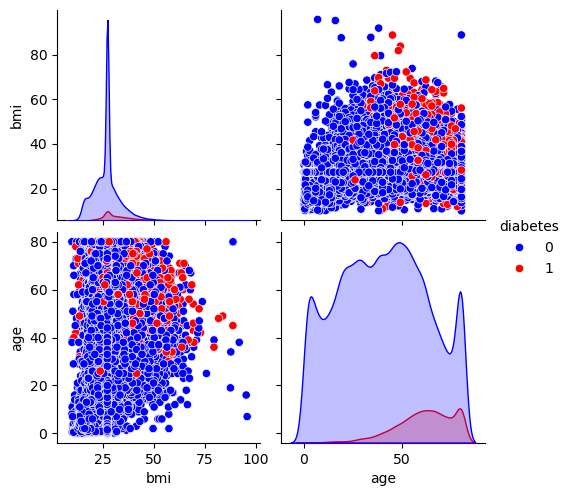

In [26]:
# Generar el pairplot
sns.pairplot(df, vars=['bmi', 'age'], hue='diabetes', diag_kind='kde', palette={0: "blue", 1: "red"})

# Mostrar el gráfico
plt.show()

La diabetes (rojo) es más frecuente en personas con bmi alto y edad avanzada, lo que indica que ambos factores pueden estar relacionados con un mayor riesgo de diabetes.

Conclusión: existe una correlación positiva moderada de 0,3374 entre el índice de masa corporal BMI y la edad, es decir, a medida que aumenta la edad los individuos en algunos casos, tienden a aumentar su BMI. Sin embargo, no es lo suficientemente fuerte como para ser considerada altamente significativa. 

### Conclusiones:

El análisis bivariado indica que tanto el BMI como la Edad tienen una relación significativa con la diabetes. Las personas con un BMI alto y aquellas de mayor edad tienen un riesgo más elevado de desarrollar la enfermedad. Estos resultados destacan la importancia de implementar estrategias preventivas enfocadas en el control del peso y el seguimiento de factores de riesgo en adultos mayores.

Aunque existe una tendencia de que las personas mayores tienden a tener un BMI más alto, esta relación no es lo suficientemente fuerte como para ser concluyente. 

**Próximos pasos** Implementar un modelo de regresión multivariable para evaluar cómo factores como el BMI, la edad, la hipertensión, y los niveles de glucosa interactúan en el riesgo de diabetes. Además, sería útil explorar la distribución del BMI en diferentes grupos etarios y realizar modelos predictivos para estimar la probabilidad de desarrollar diabetes. También se pueden analizar las comorbilidades (hipertensión, enfermedades cardíacas) en conjunto con la edad y el BMI para identificar patrones de riesgo más complejos.